In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [319]:
import re, string, unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from math import log

In [2]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [3]:
f = open("../dataset/passage_collection_new.txt", 'r', encoding = 'utf-8') 

In [4]:
document = f.read()

In [201]:
header_list = ["qid", "pid", "query", "passage"]
candidate_passages_top1000 = pd.read_csv("../dataset/candidate_passages_top1000.tsv", sep='\t', names=header_list)

In [204]:
header_list = ["qid", "query"]
test_queries = pd.read_csv("../dataset/test-queries.tsv", sep='\t', names=header_list)

# Preprocessing

## Lowercase

In [7]:
# document = document.lower()

## Tokenizing

In [8]:
# tokens = nltk.word_tokenize(document)

## Remove Punctuation

In [9]:
def remove_punctuation(tokens):
    new_tokens = []
    for token in tokens:
        new_token = re.sub(r'[^\w\s]', '', token)
        if new_token != '':
            new_tokens.append(new_token)
    return new_tokens

In [10]:
# tokens = remove_punctuation(tokens)

## Remove Stopwords

In [11]:
def remove_stopwords(tokens):
    new_tokens = []
    stopword_set = set(stopwords.words('english'))
    for token in tokens:
        if token not in stopword_set:
            new_tokens.append(token)
    return new_tokens


In [12]:
# tokens = remove_stopwords(tokens)

## Lemmatization

In [13]:
def lemmatize_verbs(tokens):
    lemmatizer = WordNetLemmatizer()
    root_words = []
    for token in tokens:
        root_word = lemmatizer.lemmatize(token, pos='v')
#         root_word = lemmatizer.lemmatize(token, pos='n')
#         root_word = lemmatizer.lemmatize(token, pos='a')
        root_words.append(root_word)
    return root_words

In [14]:
# tokens = lemmatize_verbs(tokens)

## Remove numbers

In [15]:
def remove_numbers(tokens):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_tokens = []
    for token in tokens:
        if token.isdigit():
            pass
        else:
            new_tokens.append(token)
    return new_tokens


In [16]:
# tokens = remove_numbers(tokens)

In [17]:
def preprocessing(passage):
    passage = passage.lower()
    tokens = nltk.word_tokenize(passage)
    tokens = remove_punctuation(tokens)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_verbs(tokens)
    tokens = remove_numbers(tokens)
    return tokens

## Zipf's law

### When demonstrating Zipf's law, we should keep all the stop words, otherwise, the law may not hold.

In [174]:
document = document.lower()

In [175]:
tokens = nltk.word_tokenize(document)
tokens = remove_punctuation(tokens)
tokens = remove_numbers(tokens)

In [176]:
import collections

In [177]:
word_frequencies = collections.Counter(tokens)

In [192]:
word_frequencies['this']

42771

In [179]:
top_word_frequencies = word_frequencies.most_common()

In [185]:
total_number_words = len(tokens)
def get_constant_c(top_word_frequencies):
    c = 0
    total_unique_word_number = len(top_word_frequencies)
    for idx, (word, frequnecy) in enumerate(top_word_frequencies):
        rank = idx + 1
        prob = frequnecy / total_number_words
        c += rank * prob
    result = c / total_unique_word_number
    return result


## Plot Zipf's Law

In [300]:
def get_total_words(number_of_words):
    total_words = 0
    for (word, freq) in top_word_frequencies[:number_of_words]:
        total_words += freq
    return total_words

def get_occurence_prob_list(number_of_words):
    number_of_total_words = get_total_words(number_of_words)
    prob_list = []
    for (word, freq) in top_word_frequencies[:number_of_words]:
        prob_list.append(freq / number_of_total_words)
    return prob_list

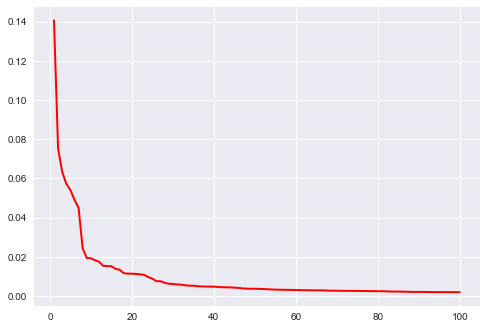

In [303]:
import re
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

n = 100

frequency = {}

for token, freq in top_word_frequencies[0:n]:
    frequency[token] = freq


x = np.arange(1., n+1)
y = get_occurence_prob_list(n)
plt.plot(x, y, linewidth=2, color='r')
plt.show()

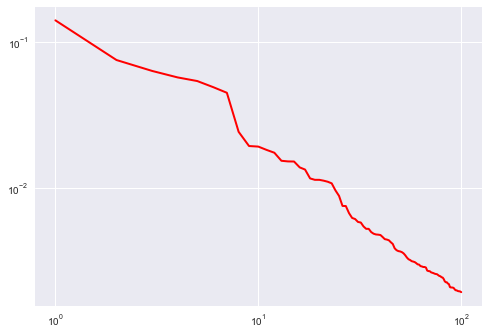

In [307]:
import re
import matplotlib.pyplot as plt
import numpy as np

n = 100

frequency = {}

for token, freq in top_word_frequencies[0:n]:
    frequency[token] = freq

x = np.arange(1., n+1)
y = get_occurence_prob_list(n)
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, linewidth=2, color='r')
plt.show()

In [309]:
def get_ideal_zipf_probs(number_of_unique_words):
    c = 0.1
    zipf_probs = []
    for i in range(number_of_unique_words):
        ranking = i + 1
        occurence_prob = c / ranking
        zipf_probs.append(occurence_prob)
    return zipf_probs

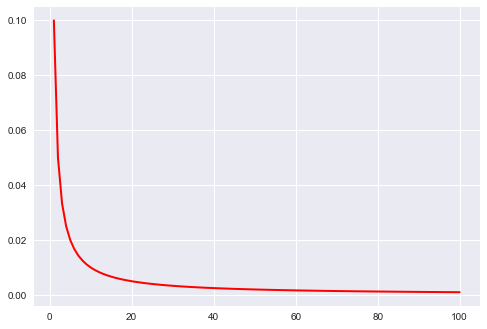

In [312]:
x = np.arange(1., n+1)
y = get_ideal_zipf_probs(n)
plt.plot(x, y, linewidth=2, color='r')
plt.show()

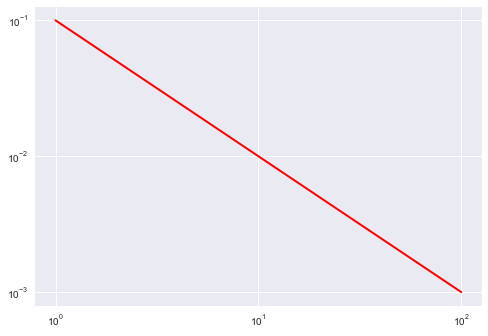

In [313]:
x = np.arange(1., n+1)
y = get_ideal_zipf_probs(n)
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, linewidth=2, color='r')
plt.show()

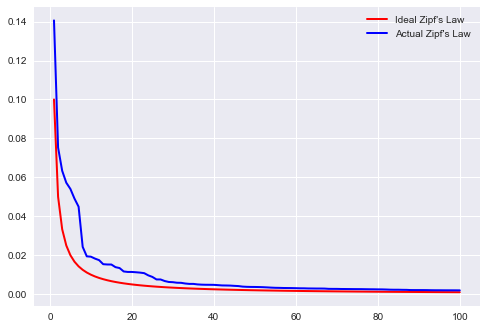

In [317]:
n = 100
x = np.arange(1., n+1)
y = get_ideal_zipf_probs(n)
y2 = get_occurence_prob_list(n)
plt.plot(x, y, linewidth=2, color='r')
plt.plot(x, y2, linewidth=2, color='b')
plt.legend(["Ideal Zipf's Law", "Actual Zipf's Law"], loc ="upper right")
plt.show()

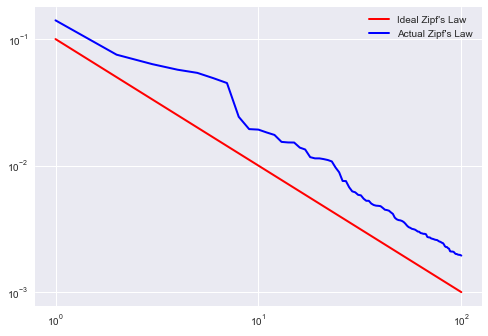

In [318]:
n = 100
x = np.arange(1., n+1)
y = get_ideal_zipf_probs(n)
y2 = get_occurence_prob_list(n)
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y, linewidth=2, color='r')
plt.plot(x, y2, linewidth=2, color='b')
plt.legend(["Ideal Zipf's Law", "Actual Zipf's Law"], loc ="upper right")
plt.show()

# Inverted Index

In [18]:
candidate_passages_top1000_no_dup = candidate_passages_top1000.drop_duplicates(subset=['pid'], inplace=False)

In [19]:
import time

start = time.time()
inverted_index = {}

for idx, row in candidate_passages_top1000_no_dup.iterrows():
    pid = row['pid']
    tokens = preprocessing(row['passage'])
    freqDist = nltk.FreqDist(tokens)
    passage_words_count = len(tokens)
    for token, freq in freqDist.items():
        inverted_index.setdefault(token, [])
        inverted_index[token].append((pid, freq, passage_words_count))

end = time.time()
print(end - start)

278.8622319698334


# Subtask 3

## Caluclate TF-IDF

In [20]:
import numpy as np
tf_idf = {}
number_of_passages = len(candidate_passages_top1000_no_dup)
for token, tuple_list in inverted_index.items():
    df = len(tuple_list)
    for pid, freq, passage_word_count in tuple_list:
        tf = freq/passage_word_count
        idf = np.log((number_of_passages+1)/(df+1))
        tf_idf[pid, token] = tf*idf

## Vectors Representation + top100

In [21]:
total_tokens = list(inverted_index.keys())

In [22]:
num_of_words = len(total_tokens)
number_of_passages = len(candidate_passages_top1000_no_dup)
def query_vector_generate(tokens):

    queryVector = np.zeros((num_of_words))
    
    queryFreqDist = nltk.FreqDist(tokens)
    words_count = len(tokens)
    
    for token in np.unique(tokens):
        
        tf = queryFreqDist[token]/words_count
        try:
            df = len(inverted_index[token])
        except:
            df = 0
        idf = math.log((number_of_passages+1)/(df+1))

        try:
            idx = total_tokens.index(token)
            queryVector[idx] = tf*idf
        except:
            pass
    return queryVector

In [23]:
def passage_vector_generate(tokens, pid):
    passageVector = np.zeros((num_of_words))
    
    for token in np.unique(tokens):
        try:
            idx = total_tokens.index(token)
            passageVector[idx] = tf_idf[(pid, token)]
        except:
            pass
    return passageVector
    

In [24]:
def cosine_sim_formula(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

In [25]:
def cosine_similarity_cal(query, passage, pid):
    query_tokens = preprocessing(query)
    passage_tokens = preprocessing(passage)
        
    query_vector = query_vector_generate(query_tokens)
    passage_vector = passage_vector_generate(passage_tokens, pid)
    
    
    return cosine_sim_formula(query_vector, passage_vector)
    

In [26]:
def cosine_similarity_ranking(number_of_retrieved, cosine_sim_array):
    result = np.array(cosine_sim_array).argsort()[-number_of_retrieved:][::-1]
    return result

In [213]:
simlarity_values_dict = {}
for idx, row in test_queries.iterrows():
    print("idx:",idx + 1)
    qid = row['qid']
    simlarity_values_dict[qid] = []
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    for idx2, row2 in passages_top1000_df.iterrows():
        pid = row2['pid']
        passage = row2['passage']
        query = row2['query']
        simlarity_values_dict[qid].append(cosine_similarity_cal(query, passage, pid))

idx: 1
idx: 2
idx: 3
idx: 4
idx: 5
idx: 6
idx: 7
idx: 8
idx: 9
idx: 10
idx: 11
idx: 12
idx: 13
idx: 14
idx: 15
idx: 16
idx: 17
idx: 18
idx: 19
idx: 20
idx: 21
idx: 22
idx: 23
idx: 24
idx: 25
idx: 26
idx: 27
idx: 28
idx: 29
idx: 30
idx: 31
idx: 32
idx: 33
idx: 34
idx: 35
idx: 36
idx: 37
idx: 38
idx: 39
idx: 40
idx: 41
idx: 42
idx: 43
idx: 44
idx: 45
idx: 46
idx: 47
idx: 48
idx: 49
idx: 50
idx: 51
idx: 52
idx: 53
idx: 54
idx: 55
idx: 56
idx: 57
idx: 58
idx: 59
idx: 60
idx: 61
idx: 62
idx: 63
idx: 64
idx: 65
idx: 66
idx: 67
idx: 68
idx: 69
idx: 70
idx: 71
idx: 72
idx: 73
idx: 74
idx: 75
idx: 76
idx: 77
idx: 78
idx: 79
idx: 80
idx: 81
idx: 82
idx: 83
idx: 84
idx: 85
idx: 86
idx: 87
idx: 88
idx: 89
idx: 90
idx: 91
idx: 92
idx: 93
idx: 94
idx: 95
idx: 96
idx: 97
idx: 98
idx: 99
idx: 100
idx: 101
idx: 102
idx: 103
idx: 104
idx: 105
idx: 106
idx: 107
idx: 108
idx: 109
idx: 110
idx: 111
idx: 112
idx: 113
idx: 114
idx: 115
idx: 116
idx: 117
idx: 118
idx: 119
idx: 120
idx: 121
idx: 122
idx: 123
i

In [217]:
results_VS = {}
for idx, row in test_queries.iterrows():
    qid = row['qid']
    results_VS[qid] = cosine_similarity_ranking(100, simlarity_values_dict[qid])

In [241]:
tf_idf_top100_each_query_df = {}
for qid, idx_list in results_VS.items():
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    passages_top1000_df = passages_top1000_df.reset_index(drop=True)
    tf_idf_top100 = passages_top1000_df.loc[idx_list]
    tf_idf_top100 = tf_idf_top100.reset_index(drop=True)
    tf_idf_top100['score'] = np.array(simlarity_values_dict[qid])[idx_list]
    tf_idf_top100_each_query_df[qid] = tf_idf_top100

In [244]:
f = open("VS.txt", "w")
for df in tf_idf_top100_each_query_df.values():
    for idx, row in df.iterrows():
        qid = str(row['qid'])
        pid = str(row['pid'])
        score = str(row['score'])
        rank = str(idx + 1)
        f.write(qid + " A1 " + pid + " " + rank + " " + score + " VS" + "\n")
f.close()

# BM25

In [30]:
def get_passage_average_length_and_total_word_occurences_corpus():
    number_of_passages = len(candidate_passages_top1000_no_dup)
    count_total_length = 0
    for idx, row in candidate_passages_top1000_no_dup.iterrows():
        count_total_length += len(preprocessing(row['passage']))
    return count_total_length, count_total_length/number_of_passages 


In [31]:
total_word_occurences, avdl = get_passage_average_length_and_total_word_occurences_corpus()

In [32]:
k1 = 1.2
k2 = 100
b = 0.75
R = 0
r = 0
N = number_of_passages

def K_cal(dl):
    return k1 * ((1-b) + b * (float(dl)/float(avdl)) )


def BM25_cal(query, passage):
    query_tokens = preprocessing(query)
    passage_tokens = preprocessing(passage)
    query_length = len(query_tokens)
    query_token_freq_dict = nltk.FreqDist(query_tokens)
    passage_token_freq_dict = nltk.FreqDist(passage_tokens)
    dl = len(passage_tokens)
    K = K_cal(dl)
    score = 0
    for token in query_tokens:
        try:
            n = len(inverted_index[token])
        except:
            n = 0
        f = passage_token_freq_dict[token]
        qf = query_token_freq_dict[token]
        first_term = log( ( (r + 0.5) / (R - r + 0.5) ) / ( (n - r + 0.5) / (N - n - R + r + 0.5)) )
        second_term = ((k1 + 1) * f) / (K + f)
        third_term = ((k2+1) * qf) / (k2 + qf)
        score += first_term * second_term * third_term
    return score
    

In [248]:
bm25_cal_dict = {}
for idx, row in test_queries.iterrows():
    print("idx:",idx + 1)
    qid = row['qid']
    bm25_cal_dict[qid] = []
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    for idx2, row2 in passages_top1000_df.iterrows():
        passage = row2['passage']
        query = row2['query']
        bm25_cal_dict[qid].append(BM25_cal(query, passage))

idx: 1
idx: 2
idx: 3
idx: 4
idx: 5
idx: 6
idx: 7
idx: 8
idx: 9
idx: 10
idx: 11
idx: 12
idx: 13
idx: 14
idx: 15
idx: 16
idx: 17
idx: 18
idx: 19
idx: 20
idx: 21
idx: 22
idx: 23
idx: 24
idx: 25
idx: 26
idx: 27
idx: 28
idx: 29
idx: 30
idx: 31
idx: 32
idx: 33
idx: 34
idx: 35
idx: 36
idx: 37
idx: 38
idx: 39
idx: 40
idx: 41
idx: 42
idx: 43
idx: 44
idx: 45
idx: 46
idx: 47
idx: 48
idx: 49
idx: 50
idx: 51
idx: 52
idx: 53
idx: 54
idx: 55
idx: 56
idx: 57
idx: 58
idx: 59
idx: 60
idx: 61
idx: 62
idx: 63
idx: 64
idx: 65
idx: 66
idx: 67
idx: 68
idx: 69
idx: 70
idx: 71
idx: 72
idx: 73
idx: 74
idx: 75
idx: 76
idx: 77
idx: 78
idx: 79
idx: 80
idx: 81
idx: 82
idx: 83
idx: 84
idx: 85
idx: 86
idx: 87
idx: 88
idx: 89
idx: 90
idx: 91
idx: 92
idx: 93
idx: 94
idx: 95
idx: 96
idx: 97
idx: 98
idx: 99
idx: 100
idx: 101
idx: 102
idx: 103
idx: 104
idx: 105
idx: 106
idx: 107
idx: 108
idx: 109
idx: 110
idx: 111
idx: 112
idx: 113
idx: 114
idx: 115
idx: 116
idx: 117
idx: 118
idx: 119
idx: 120
idx: 121
idx: 122
idx: 123
i

In [249]:
def bm25_ranking(number_of_retrieved, bm25_array):
    result = np.array(bm25_array).argsort()[-number_of_retrieved:][::-1]
    return result

In [250]:
results_bm25 = {}
for idx, row in test_queries.iterrows():
    qid = row['qid']
    results_bm25[qid] = bm25_ranking(100, bm25_cal_dict[qid])

In [251]:
bm25_top100_each_query_df = {}
for qid, idx_list in results_bm25.items():
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    passages_top1000_df = passages_top1000_df.reset_index(drop=True)
    bm25_top100 = passages_top1000_df.loc[idx_list]
    bm25_top100 = bm25_top100.reset_index(drop=True)
    bm25_top100['score'] = np.array(bm25_cal_dict[qid])[idx_list]
    bm25_top100_each_query_df[qid] = bm25_top100

In [252]:
f = open("BM25.txt", "w")
for df in bm25_top100_each_query_df.values():
    for idx, row in df.iterrows():
        qid = str(row['qid'])
        pid = str(row['pid'])
        score = str(row['score'])
        rank = str(idx + 1)
        f.write(qid + " A1 " + pid + " " + rank + " " + score + " BM25" + "\n")
f.close()

# Subtask 4

## Calcu

In [58]:
## calculate Y
V = 0
dict_temp = {}
for idx, row in candidate_passages_top1000_no_dup.iterrows():
    tokens = preprocessing(row['passage'])
    for token in tokens:
        inverted_index.setdefault(token, 1)
    
V = len(list_temp)

## Laplace

In [116]:
def QLModel_Laplace(query, passage):
    query_tokens = preprocessing(query)
    passage_tokens = preprocessing(passage)
    D = len(passage_tokens)
    passage_token_freq_dict = nltk.FreqDist(passage_tokens)
    distribution = 0
    for token in query_tokens:
#         distribution *= ((passage_token_freq_dict[token] + 1)/(D + V))
        distribution += log((passage_token_freq_dict[token] + 1)/(D + V))
        
    return distribution
    

In [253]:
laplace_cal_dict = {}
for idx, row in test_queries.iterrows():
    print("idx:",idx + 1)
    qid = row['qid']
    laplace_cal_dict[qid] = []
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    for idx2, row2 in passages_top1000_df.iterrows():
        passage = row2['passage']
        query = row2['query']
        laplace_cal_dict[qid].append(QLModel_Laplace(query, passage))

idx: 1
idx: 2
idx: 3
idx: 4
idx: 5
idx: 6
idx: 7
idx: 8
idx: 9
idx: 10
idx: 11
idx: 12
idx: 13
idx: 14
idx: 15
idx: 16
idx: 17
idx: 18
idx: 19
idx: 20
idx: 21
idx: 22
idx: 23
idx: 24
idx: 25
idx: 26
idx: 27
idx: 28
idx: 29
idx: 30
idx: 31
idx: 32
idx: 33
idx: 34
idx: 35
idx: 36
idx: 37
idx: 38
idx: 39
idx: 40
idx: 41
idx: 42
idx: 43
idx: 44
idx: 45
idx: 46
idx: 47
idx: 48
idx: 49
idx: 50
idx: 51
idx: 52
idx: 53
idx: 54
idx: 55
idx: 56
idx: 57
idx: 58
idx: 59
idx: 60
idx: 61
idx: 62
idx: 63
idx: 64
idx: 65
idx: 66
idx: 67
idx: 68
idx: 69
idx: 70
idx: 71
idx: 72
idx: 73
idx: 74
idx: 75
idx: 76
idx: 77
idx: 78
idx: 79
idx: 80
idx: 81
idx: 82
idx: 83
idx: 84
idx: 85
idx: 86
idx: 87
idx: 88
idx: 89
idx: 90
idx: 91
idx: 92
idx: 93
idx: 94
idx: 95
idx: 96
idx: 97
idx: 98
idx: 99
idx: 100
idx: 101
idx: 102
idx: 103
idx: 104
idx: 105
idx: 106
idx: 107
idx: 108
idx: 109
idx: 110
idx: 111
idx: 112
idx: 113
idx: 114
idx: 115
idx: 116
idx: 117
idx: 118
idx: 119
idx: 120
idx: 121
idx: 122
idx: 123
i

In [255]:
def laplace_ranking(number_of_retrieved, laplace_array):
    result = np.array(laplace_array).argsort()[-number_of_retrieved:][::-1]
    return result

In [256]:
results_laplace = {}
for idx, row in test_queries.iterrows():
    qid = row['qid']
    results_laplace[qid] = laplace_ranking(100, laplace_cal_dict[qid])

In [257]:
laplace_top100_each_query_df = {}
for qid, idx_list in results_laplace.items():
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    passages_top1000_df = passages_top1000_df.reset_index(drop=True)
    laplace_top100 = passages_top1000_df.loc[idx_list]
    laplace_top100 = laplace_top100.reset_index(drop=True)
    laplace_top100['score'] = np.array(laplace_cal_dict[qid])[idx_list]
    laplace_top100_each_query_df[qid] = laplace_top100

In [258]:
f = open("LM-Laplace.txt", "w")
for df in laplace_top100_each_query_df.values():
    for idx, row in df.iterrows():
        qid = str(row['qid'])
        pid = str(row['pid'])
        score = str(row['score'])
        rank = str(idx + 1)
        f.write(qid + " A1 " + pid + " " + rank + " " + score + " LM-Laplace" + "\n")
f.close()

## Lindstone

In [65]:
from math import log
def QLModel_Lindstone(query, passage):
    query_tokens = preprocessing(query)
    passage_tokens = preprocessing(passage)
    D = len(passage_tokens)
    passage_token_freq_dict = nltk.FreqDist(passage_tokens)
    score = 0
    alpha = 0.5
    for token in query_tokens:
        score += log((passage_token_freq_dict[token] + alpha)/(D + V * alpha))
    return score
        

In [259]:
lindstone_cal_dict = {}
for idx, row in test_queries.iterrows():
    print("idx:",idx + 1)
    qid = row['qid']
    lindstone_cal_dict[qid] = []
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    for idx2, row2 in passages_top1000_df.iterrows():
        passage = row2['passage']
        query = row2['query']
        lindstone_cal_dict[qid].append(QLModel_Lindstone(query, passage))

idx: 1
idx: 2
idx: 3
idx: 4
idx: 5
idx: 6
idx: 7
idx: 8
idx: 9
idx: 10
idx: 11
idx: 12
idx: 13
idx: 14
idx: 15
idx: 16
idx: 17
idx: 18
idx: 19
idx: 20
idx: 21
idx: 22
idx: 23
idx: 24
idx: 25
idx: 26
idx: 27
idx: 28
idx: 29
idx: 30
idx: 31
idx: 32
idx: 33
idx: 34
idx: 35
idx: 36
idx: 37
idx: 38
idx: 39
idx: 40
idx: 41
idx: 42
idx: 43
idx: 44
idx: 45
idx: 46
idx: 47
idx: 48
idx: 49
idx: 50
idx: 51
idx: 52
idx: 53
idx: 54
idx: 55
idx: 56
idx: 57
idx: 58
idx: 59
idx: 60
idx: 61
idx: 62
idx: 63
idx: 64
idx: 65
idx: 66
idx: 67
idx: 68
idx: 69
idx: 70
idx: 71
idx: 72
idx: 73
idx: 74
idx: 75
idx: 76
idx: 77
idx: 78
idx: 79
idx: 80
idx: 81
idx: 82
idx: 83
idx: 84
idx: 85
idx: 86
idx: 87
idx: 88
idx: 89
idx: 90
idx: 91
idx: 92
idx: 93
idx: 94
idx: 95
idx: 96
idx: 97
idx: 98
idx: 99
idx: 100
idx: 101
idx: 102
idx: 103
idx: 104
idx: 105
idx: 106
idx: 107
idx: 108
idx: 109
idx: 110
idx: 111
idx: 112
idx: 113
idx: 114
idx: 115
idx: 116
idx: 117
idx: 118
idx: 119
idx: 120
idx: 121
idx: 122
idx: 123
i

In [260]:
def lindstone_ranking(number_of_retrieved, lindstone_array):
    result = np.array(lindstone_array).argsort()[-number_of_retrieved:][::-1]
    return result

In [261]:
results_lindstone = {}
for idx, row in test_queries.iterrows():
    qid = row['qid']
    results_lindstone[qid] = lindstone_ranking(100, lindstone_cal_dict[qid])

In [262]:
lindstone_top100_each_query_df = {}
for qid, idx_list in results_lindstone.items():
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    passages_top1000_df = passages_top1000_df.reset_index(drop=True)
    lindstone_top100 = passages_top1000_df.loc[idx_list]
    lindstone_top100 = lindstone_top100.reset_index(drop=True)
    lindstone_top100['score'] = np.array(lindstone_cal_dict[qid])[idx_list]
    lindstone_top100_each_query_df[qid] = lindstone_top100

In [263]:
f = open("LM-Lindstone.txt", "w")
for df in lindstone_top100_each_query_df.values():
    for idx, row in df.iterrows():
        qid = str(row['qid'])
        pid = str(row['pid'])
        score = str(row['score'])
        rank = str(idx + 1)
        f.write(qid + " A1 " + pid + " " + rank + " " + score + " LM-Lindstone" + "\n") 
f.close()

## Dirichlet

In [69]:
def get_corpus_freq(token):
    freq = 0
    try:
        for tup in inverted_index[token]:
            freq += tup[1]
    except:
        pass
    return freq

In [70]:
from math import log
def QLModel_Dirichlet(query, passage):
    query_tokens = preprocessing(query)
    passage_tokens = preprocessing(passage)
    passage_token_freq_dict = nltk.FreqDist(passage_tokens)
    N = len(passage_tokens)
    micro = 2000
    score = 0
    for token in query_tokens:
        corpus_freq = get_corpus_freq(token)
        lambda_dirichlet = N / (N + micro)
        one_minus_lambda_dirichlet = micro / (N + micro)
        first_term = lambda_dirichlet * (passage_token_freq_dict[token] / N)
        second_term = one_minus_lambda_dirichlet * (corpus_freq / total_word_occurences)
        if (first_term + second_term == 0):
            continue
        score += log(first_term + second_term)
    return score
        

In [264]:
dirichlet_cal_dict = {}
for idx, row in test_queries.iterrows():
    print("idx:",idx + 1)
    qid = row['qid']
    dirichlet_cal_dict[qid] = []
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    for idx2, row2 in passages_top1000_df.iterrows():
        passage = row2['passage']
        query = row2['query']
        dirichlet_cal_dict[qid].append(QLModel_Dirichlet(query, passage))

idx: 1
idx: 2
idx: 3
idx: 4
idx: 5
idx: 6
idx: 7
idx: 8
idx: 9
idx: 10
idx: 11
idx: 12
idx: 13
idx: 14
idx: 15
idx: 16
idx: 17
idx: 18
idx: 19
idx: 20
idx: 21
idx: 22
idx: 23
idx: 24
idx: 25
idx: 26
idx: 27
idx: 28
idx: 29
idx: 30
idx: 31
idx: 32
idx: 33
idx: 34
idx: 35
idx: 36
idx: 37
idx: 38
idx: 39
idx: 40
idx: 41
idx: 42
idx: 43
idx: 44
idx: 45
idx: 46
idx: 47
idx: 48
idx: 49
idx: 50
idx: 51
idx: 52
idx: 53
idx: 54
idx: 55
idx: 56
idx: 57
idx: 58
idx: 59
idx: 60
idx: 61
idx: 62
idx: 63
idx: 64
idx: 65
idx: 66
idx: 67
idx: 68
idx: 69
idx: 70
idx: 71
idx: 72
idx: 73
idx: 74
idx: 75
idx: 76
idx: 77
idx: 78
idx: 79
idx: 80
idx: 81
idx: 82
idx: 83
idx: 84
idx: 85
idx: 86
idx: 87
idx: 88
idx: 89
idx: 90
idx: 91
idx: 92
idx: 93
idx: 94
idx: 95
idx: 96
idx: 97
idx: 98
idx: 99
idx: 100
idx: 101
idx: 102
idx: 103
idx: 104
idx: 105
idx: 106
idx: 107
idx: 108
idx: 109
idx: 110
idx: 111
idx: 112
idx: 113
idx: 114
idx: 115
idx: 116
idx: 117
idx: 118
idx: 119
idx: 120
idx: 121
idx: 122
idx: 123
i

In [265]:
def dirichlet_ranking(number_of_retrieved, dirichlet_array):
    result = np.array(dirichlet_array).argsort()[-number_of_retrieved:][::-1]
    return result

In [266]:
results_dirichlet = {}
for idx, row in test_queries.iterrows():
    qid = row['qid']
    results_dirichlet[qid] = dirichlet_ranking(100, dirichlet_cal_dict[qid])

In [267]:
dirichlet_top100_each_query_df = {}
for qid, idx_list in results_dirichlet.items():
    passages_top1000_df = candidate_passages_top1000[candidate_passages_top1000['qid'] == qid]
    passages_top1000_df = passages_top1000_df.reset_index(drop=True)
    dirichlet_top100 = passages_top1000_df.loc[idx_list]
    dirichlet_top100 = dirichlet_top100.reset_index(drop=True)
    dirichlet_top100['score'] = np.array(dirichlet_cal_dict[qid])[idx_list]
    dirichlet_top100_each_query_df[qid] = dirichlet_top100

In [268]:
f = open("LM-Dirichlet.txt", "w")
for df in dirichlet_top100_each_query_df.values():
    for idx, row in df.iterrows():
        qid = str(row['qid'])
        pid = str(row['pid'])
        score = str(row['score'])
        rank = str(idx + 1)
        f.write(qid + " A1 " + pid + " " + rank + " " + score + " LM-Dirichlet" + "\n")
f.close()